In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
import matplotlib as pyplot

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


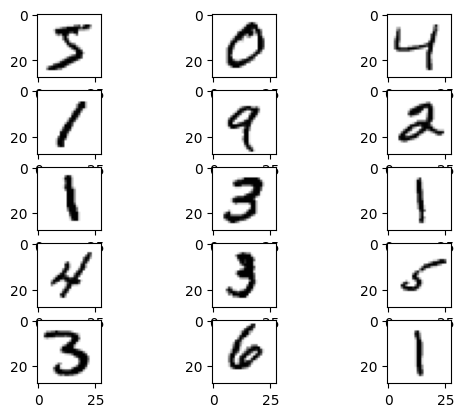

In [4]:
from matplotlib import pyplot
fig , axs = pyplot.subplots(5, 3)
cnt = 0
for i in range(5):
     for j in range(3):
       axs[i, j].imshow(x_train[cnt], cmap='gray_r')
       cnt += 1

In [5]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [6]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
# resize and normalize
x_train = np.reshape(x_train, [-1, 784])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, 784])
x_test = x_test.astype('float32') / 255

In [9]:
x_train.shape

(60000, 784)

In [10]:
# create model
model = Sequential()
model.add(Dense(512, input_dim=784, kernel_initializer= 'uniform' , activation= 'relu' ))

model.add(Dense(256, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(10, kernel_initializer= 'uniform' , activation= 'softmax' ))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compile model
model.compile(loss= 'categorical_crossentropy', optimizer= tf.keras.optimizers.SGD(0.1) , metrics=[ 'accuracy' ])

#adam
history=model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 8s 9ms/step - loss: 0.6378 - accuracy: 0.8258 - val_loss: 0.2777 - val_accuracy: 0.9199
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2495 - accuracy: 0.9279 - val_loss: 0.1999 - val_accuracy: 0.9390
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1815 - accuracy: 0.9474 - val_loss: 0.1538 - val_accuracy: 0.9556
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1415 - accuracy: 0.9592 - val_loss: 0.1256 - val_accuracy: 0.9620
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1142 - accuracy: 0.9671 - val_loss: 0.1081 - val_accuracy: 0.9671
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0949 - accuracy: 0.9729 - val_loss: 0.1003 - val_accuracy: 0.9678
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0810 - accuracy: 0.9770 - val_loss: 0.0914 - val_accuracy: 0.9714
Epoch 

In [13]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.9828
accuracy: 98.28%
